# Load Data

In [121]:
# 需要用到的函数
def rmConstant(data):
    data = data.loc[:, (data != data.iloc[0]).any()]
    return(data)

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
#from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import gc
gc.enable()
%matplotlib inline

In [123]:
# half processed 是经过之前的preprocessing，但是没有进行最后一步Label Encoder
train = pd.read_csv('train_half_processed.csv',dtype={'fullVisitorId': np.str})
train = train.drop(columns=['Unnamed: 0'])
train.head()

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,device_browser,device_deviceCategory,device_isMobile,...,totals_hits,totals_newVisits,totals_pageviews,totals_transactionRevenue,trafficSource_campaign,trafficSource_isTrueDirect,trafficSource_keyword,trafficSource_medium,trafficSource_referralPath,trafficSource_source
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,1472830385,1,1472830385,Chrome,desktop,False,...,1,1.0,1.0,NaN,(not set),missing,(not provided),organic,missing,google
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,1472880147,1,1472880147,Firefox,desktop,False,...,1,1.0,1.0,NaN,(not set),missing,(not provided),organic,missing,google
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,1472865386,1,1472865386,Chrome,desktop,False,...,1,1.0,1.0,NaN,(not set),missing,(not provided),organic,missing,google
3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,1472881213,1,1472881213,UC Browser,desktop,False,...,1,1.0,1.0,NaN,(not set),missing,google + online,organic,missing,google
4,Organic Search,20160902,27294437909732085,27294437909732085_1472822600,1472822600,2,1472822600,Chrome,mobile,True,...,1,0.0,1.0,NaN,(not set),True,(not provided),organic,missing,google


In [58]:
# drop the columns wiht missing values over 50% in the training data?
# drop_col = ['trafficSource_isTrueDirect','trafficSource_referralPath','trafficSource_keyword','totals_bounces']
# train = train.drop(columns = drop_col)

# Preprocessing

In [124]:
# 1. totals_transactionRevenue is postive
train =  train[train['totals_transactionRevenue'].isna() == False]

In [125]:
# 2. remove the constant column "totals_bounces"
train = rmConstant(train)

In [127]:
# 3. calculate not set number in features
# (not set) is type of missing value
replaces_col = ['geoNetwork_city','geoNetwork_continent','geoNetwork_country','geoNetwork_metro','geoNetwork_networkDomain','geoNetwork_region',
               'geoNetwork_subContinent','trafficSource_campaign','trafficSource_medium','trafficSource_source']


for col in replaces_col:
    number = train[train[col] == '(not set)'].shape[0]
    print("number of not set in {} : {},  percentage: {}".format(col,number,round(number/train.shape[0],4)))

number of not set in geoNetwork_city : 49,  percentage: 0.0043
number of not set in geoNetwork_continent : 6,  percentage: 0.0005
number of not set in geoNetwork_country : 6,  percentage: 0.0005
number of not set in geoNetwork_metro : 269,  percentage: 0.0234
number of not set in geoNetwork_networkDomain : 6645,  percentage: 0.5771
number of not set in geoNetwork_region : 46,  percentage: 0.004
number of not set in geoNetwork_subContinent : 6,  percentage: 0.0005
number of not set in trafficSource_campaign : 11050,  percentage: 0.9596
number of not set in trafficSource_medium : 1,  percentage: 0.0001
number of not set in trafficSource_source : 0,  percentage: 0.0


# Time Plots

In [128]:
# 1. 缩小 totals_transactionRevenue 10**8 ,使得更易于展示
train['totals_transactionRevenue'] = train['totals_transactionRevenue'] / 100000000

Text(0.5,1,'totals_transactionRevenue according to date')

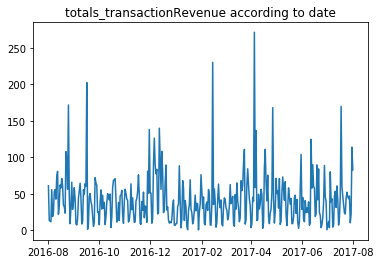

In [146]:
# 2. create data frame names df to store data information and  totals_transactionRevenue

Revenue = train.groupby('date')['totals_transactionRevenue'].sum()
df = pd.DataFrame(data = Revenue)
df = df.reset_index()

# 2.1. covert date type to datetime
def add_line(x):
    return x[0:4] + '-' + x[4:6] + '-' + x[6:]
df['date'] = list(map(add_line,df['date'].astype('str') ))
df['date'] = pd.to_datetime(df['date'])
# 2.2. plot the total amount of revenue
plt.plot(df['date'],df['totals_transactionRevenue'])
plt.title('totals_transactionRevenue according to date')

In [147]:
# 3. extract feature month 
df['month'] = df['date'].astype('str').apply(lambda x:x[5:7])
month = df.groupby('month')['totals_transactionRevenue'].sum()

Text(0.5,1,'total amount of revenue based on month')

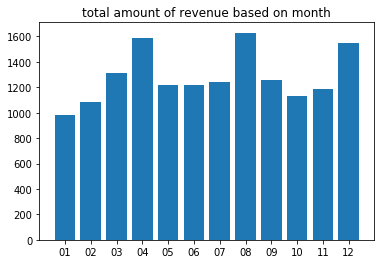

In [131]:
# 3.1 month bar plot
plt.bar(month.index,month.values)
plt.title('total amount of revenue based on month')

Text(0.5,0.98,'')

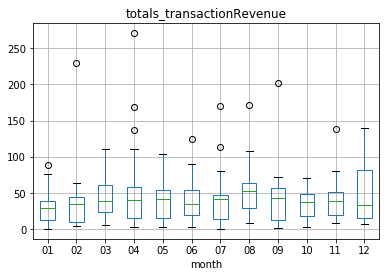

In [132]:
# 3.2 month box plot
df.boxplot(column='totals_transactionRevenue',by='month')
plt.suptitle('') 

Text(0.5,1,'total amount of revenue based on quarter')

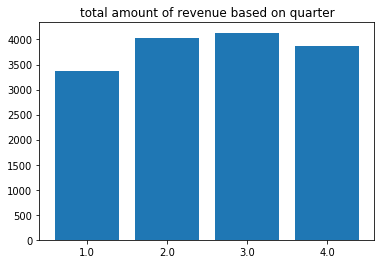

In [133]:
# 4. Quarters 
df['quarter'] = np.ceil(df['month'].astype('int') / 3 ).astype('str')
quarter = df.groupby('quarter')['totals_transactionRevenue'].sum()
# 4.1 Quarter bar plot
plt.bar(quarter.index,quarter.values)
plt.title('total amount of revenue based on quarter')


Text(0,0.5,'Amount')

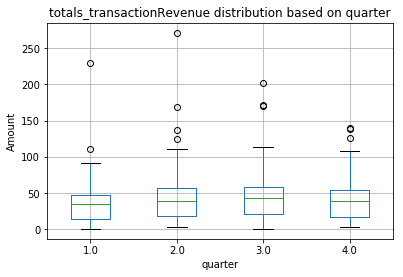

In [134]:
# 4.2 quarter box plot
df.boxplot(column='totals_transactionRevenue',by='quarter')
plt.suptitle('') 
plt.title("totals_transactionRevenue distribution based on quarter" )
plt.ylabel('Amount')

In [135]:
# 5 weekend and weekend
df['weekday'] = df['date'].apply(lambda x: x.weekday())
df['weekend'] = df['date'].apply(lambda x : 0 if x.weekday()< 5 else 1 )

Text(0.5,1,'total amount of revenue based on weekday')

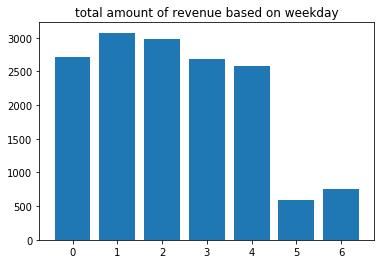

In [136]:
# 5.1 weekday bar plot
weekday = df.groupby('weekday')['totals_transactionRevenue'].sum()
plt.bar(weekday.index,weekday.values)
plt.title('total amount of revenue based on weekday')

Text(0,0.5,'Amount')

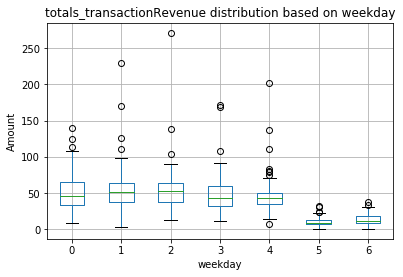

In [137]:
# 5.2 weekday box plot
df.boxplot(column='totals_transactionRevenue',by='weekday')
plt.suptitle('') 
plt.title("totals_transactionRevenue distribution based on weekday" )
plt.ylabel('Amount')

Text(0.5,1,'total amount of revenue based on weekend')

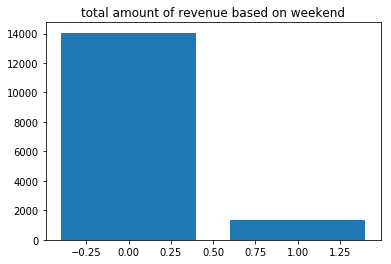

In [138]:
# 5.3 weekend bar plot
weekend = df.groupby('weekend')['totals_transactionRevenue'].sum()
plt.bar(weekend.index,weekend.values)
plt.title('total amount of revenue based on weekend')

Text(0,0.5,'Amount')

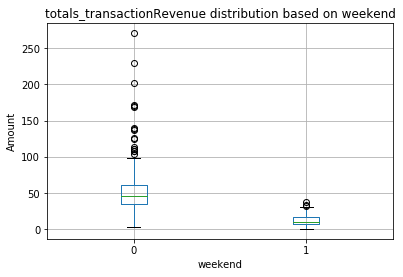

In [139]:
# 5.4 weekend box plot
df.boxplot(column='totals_transactionRevenue',by='weekend')
plt.suptitle('') 
plt.title("totals_transactionRevenue distribution based on weekend" )
plt.ylabel('Amount')